In [1]:
!conda install --yes tqdm

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following NEW packages will be INSTALLED:

    tqdm: 4.19.4-py_0 conda-forge

tqdm-4.19.4-py 100% |################################| Time: 0:00:00 183.06 kB/s


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

In [4]:
X = pd.read_pickle('../data/features.p')
y = pd.read_pickle('../data/target.p')

In [5]:
X.columns

Index(['bedroomabvgr_0', 'bedroomabvgr_1', 'bedroomabvgr_2', 'bedroomabvgr_3',
       'bedroomabvgr_4', 'bedroomabvgr_5', 'bedroomabvgr_6', 'bldgtype_1Fam',
       'bldgtype_2fmCon', 'bldgtype_Duplex',
       ...
       'masvnrarea', 'miscval', 'openporchsf', 'screenporch', 'secondflrsf',
       'threessnporch', 'totalbsmtsf', 'wooddecksf', 'yearbuilt',
       'yearremodadd'],
      dtype='object', length=354)

In [6]:
X.sample(5)

,bedroomabvgr_0,bedroomabvgr_1,bedroomabvgr_2,bedroomabvgr_3,bedroomabvgr_4,bedroomabvgr_5,bedroomabvgr_6,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,...,masvnrarea,miscval,openporchsf,screenporch,secondflrsf,threessnporch,totalbsmtsf,wooddecksf,yearbuilt,yearremodadd
id,,,,,,,,,,,,,,,,,,,,,
1400,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,16.0,0.0,448.0,0.0,976.0,147.0,1925.0,1990.0
1011,0,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,551.0,0.0,720.0,0.0,1948.0,1950.0
460,0,0,0,1,0,0,0,1,0,0,...,161.0,0.0,0.0,0.0,224.0,0.0,709.0,0.0,1950.0,1950.0
1423,0,1,0,0,0,0,0,0,0,0,...,170.0,0.0,0.0,0.0,0.0,0.0,848.0,140.0,2003.0,2003.0
98,0,0,0,1,0,0,0,1,0,0,...,48.0,0.0,0.0,0.0,0.0,0.0,960.0,120.0,1965.0,1965.0


In [7]:
X.describe()

,bedroomabvgr_0,bedroomabvgr_1,bedroomabvgr_2,bedroomabvgr_3,bedroomabvgr_4,bedroomabvgr_5,bedroomabvgr_6,bldgtype_1Fam,bldgtype_2fmCon,bldgtype_Duplex,...,masvnrarea,miscval,openporchsf,screenporch,secondflrsf,threessnporch,totalbsmtsf,wooddecksf,yearbuilt,yearremodadd
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.00000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,0.004566,0.033790,0.242009,0.557078,0.144292,0.013699,0.004566,0.838356,0.021005,0.03653,...,97.907254,32.816438,48.885845,14.038356,345.889498,3.966210,1062.935160,98.368950,1971.896804,1985.493151
std,0.067450,0.180771,0.428495,0.496958,0.351546,0.116290,0.067450,0.368292,0.143465,0.18769,...,164.611386,309.277465,65.875157,53.138641,437.972021,31.734066,435.359802,128.420637,30.179284,20.404764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,804.000000,0.000000,1954.000000,1968.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1008.000000,0.000000,1973.000000,1994.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,161.500000,0.000000,72.000000,0.000000,728.500000,0.000000,1279.500000,169.000000,2001.000000,2004.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1047.000000,8300.000000,502.000000,410.000000,2065.000000,508.000000,6110.000000,857.000000,2010.000000,2010.000000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_train_bc = pd.DataFrame()
X_test_bc = pd.DataFrame()
for col in X_train.columns:
    box_cox_trans_tr, lmbda = boxcox(X_train[col]+.000001)
    box_cox_trans_ts = boxcox(X_test[col]+.000001, lmbda)
    X_train_bc[col] = pd.Series(box_cox_trans_tr)
    X_test_bc[col] = pd.Series(box_cox_trans_ts)

/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/optimize.py:1855: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)


In [11]:
sc = StandardScaler()

In [12]:
X_train_bc_sc  = sc.fit_transform(X_train_bc)
X_test_bc_sc = sc.transform(X_test_bc)

In [13]:
lr = LinearRegression().fit(X_train_bc_sc, y_train)

In [14]:
print("Training set score: {:.2f}".format(lr.score(X_train_bc_sc, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_bc_sc, y_test)))

Training set score: 0.92
Test set score: -923152675425850993711203373209110972135218513606344704.00


In [23]:
from sklearn.linear_model import Lasso

def fit_score_lasso(alpha, verbose=True):
    
    lasso = Lasso(alpha=alpha, max_iter=1E5).fit(X_train, y_train)
    if verbose: print("Training set score: {:.4f}".format(lasso.score(X_train, y_train)))
    if verbose: print("Test set score: {:.4f}".format(lasso.score(X_test, y_test)))
    if verbose: print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
    return lasso, lasso.score(X_test, y_test)

In [16]:
# # this takes about 20 minutes
# scores = list()
# for alpha in tqdm(np.logspace(-1,4,60)):
#     scores.append(fit_score_lasso(alpha, False))
# plt.plot(np.logspace(-2,4,6), scores)
# plt.xscale('log')
# results = pd.DataFrame(np.array(scores))
# results.columns = ['model', 'test_score']
# results['alpha'] = results.model.apply(lambda x: x.alpha)

In [24]:
results = pd.read_pickle('../data/ames_lasso_results.p')

In [19]:
results.test_score.argmax()
peak = results.loc[37]
peak

model         Lasso(alpha=136.64483492953244, copy_X=True, f...
test_score                                             0.911137
alpha                                                   136.645
Name: 37, dtype: object

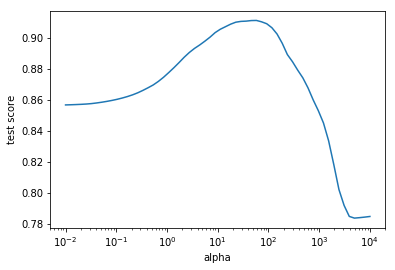

In [20]:
plt.plot(np.logspace(-2,4,60), results.test_score)
plt.xlabel('alpha')
plt.ylabel('test score')
plt.xscale('log')

In [25]:
lasso_1 = results.loc[36].model
lasso_2 = results.loc[37].model
lasso_3 = results.loc[38].model

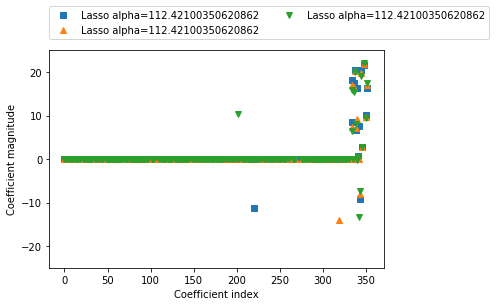

In [27]:
plt.plot(lasso_1.coef_, 's', label="Lasso alpha={}".format(results.loc[36].alpha))
plt.plot(lasso_2.coef_, '^', label="Lasso alpha={}".format(results.loc[36].alpha))
plt.plot(lasso_3.coef_, 'v', label="Lasso alpha={}".format(results.loc[36].alpha))

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [ ]:
best_results = results[results.test_score > 0.9]
best_results

In [ ]:
coefs = np.array([model.coef_ for model in best_results.model.values])
np.array(coefs).shape

In [ ]:
coefs = pd.DataFrame(coefs)
coefs.index = ['Lasso({:0.2f})'.format(alpha) for alpha in best_results.alpha.values]
coefs.columns = X.columns

In [ ]:
coefs.describe()

In [ ]:
zeros = coefs.T[(coefs.max() == 0) & (coefs.min() == 0)]
zeros.index.values

In [ ]:
X_red = X.copy()
for col in zeros.index.values:
    X_red.drop(col, axis=1, inplace=True)
X_red.shape    
